In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception

from sklearn.model_selection import train_test_split

In [4]:
cyclone_dataset_path = r"/kaggle/input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_for_reference_ds/CYCLONE_DATASET"
cyclone_infrared_path = r"/kaggle/input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
cyclone_final_path = r"/kaggle/input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL"

In [5]:
dataset = pd.read_csv(r"/kaggle/input/insat3d-infrared-raw-cyclone-images-20132021/insat_3d_ds - Sheet.csv")

In [6]:
dataset.head()

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30


In [7]:
dataset.describe()

,label
count,136.000000
mean,58.897059
std,22.043485
min,25.000000
25%,44.000000
50%,53.500000
75%,69.250000
max,128.000000


In [8]:
os.listdir(cyclone_dataset_path)

['55.jpeg',
 '30(1).jpeg',
 '59(2).jpeg',
 '59(1).jpeg',
 '56.jpeg',
 '63(2).jpeg',
 '91.jpeg',
 '50(2).jpeg',
 '47(1).jpeg',
 '44.jpeg',
 '31.jpeg',
 '25.jpeg',
 '111.jpeg',
 '43.jpeg',
 '53(2).jpeg',
 '36(2).jpeg',
 '115.jpeg',
 '67.jpeg',
 '45(3).jpeg',
 '27.jpeg',
 '48(1).jpeg',
 '45(4).jpeg',
 '45(1).jpeg',
 '86(2).jpeg',
 '102.jpeg',
 '45.jpeg',
 '53(3).jpeg',
 '69(1).jpeg',
 '28.jpeg',
 '35(3).jpeg',
 '84(1).jpeg',
 '57.jpeg',
 '47.jpeg',
 '101.jpeg',
 '67(1).jpeg',
 '98.jpeg',
 '86(1).jpeg',
 '70.jpeg',
 '85(2).jpeg',
 '39.jpeg',
 '32.jpeg',
 '49(2).jpeg',
 '48(3).jpeg',
 '42(3).jpeg',
 '42.jpeg',
 '61(2).jpeg',
 '33.jpeg',
 '36(3).jpeg',
 '48(2).jpeg',
 '118.jpeg',
 '50.jpeg',
 '65.jpeg',
 '30.jpeg',
 '49(1).jpeg',
 '68.jpeg',
 '60(1).jpeg',
 '36(1).jpeg',
 '119.jpeg',
 '59.jpeg',
 '84.jpeg',
 '106.jpeg',
 '45(2).jpeg',
 '46.jpeg',
 '47(2).jpeg',
 '68(1).jpeg',
 '57(2).jpeg',
 '64.jpeg',
 '99.jpeg',
 '51(1).jpeg',
 '74(1).jpeg',
 '57(1).jpeg',
 '52.jpeg',
 '59_LUBAN.png',
 '77

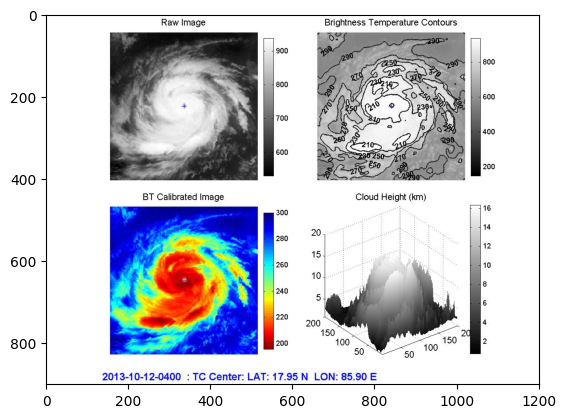

In [9]:
# Loading image from the path

image_path = os.path.join(cyclone_dataset_path,"101.jpeg")
image = cv2.imread(image_path)
plt.imshow(image)

In [10]:
# you want image with its range value
# all three channels
# normalised array
# resized image

for i,img_name in enumerate(dataset['img_name']):
    img_path = os.path.join(cyclone_infrared_path,img_name)
    img_path = os.path.normpath(img_path)
    dataset.loc[i,"image_path"] = img_path

In [11]:
images = []

for path in dataset['image_path']:
    img = cv2.imread(path)
    img = np.array(img)
    images.append(img)

In [19]:
dataset_train = ImageDataGenerator(rescale=1.0/255.0).flow_from_dataframe(dataset,directory=cyclone_infrared_path,subset="training",
                                               x_col="img_name",y_col="label",target_size=(256, 256),batch_size=16,class_mode='raw')

Found 136 validated image filenames.


In [21]:
# Neural Network

def neural_network():
    base = Xception(include_top=False,input_tensor=Input(shape=(256,256,3)))
    base.trainable = True

    flatten = base.output
    flatten = Flatten()(flatten)

    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(32,activation='relu')(dense_1)
    output = Dense(1,activation='linear')(dense_2)

    model = Model(base.input,output)

    return model

In [22]:
model = neural_network()

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])

save_best = tf.keras.callbacks.ModelCheckpoint("Model.keras", monitor='loss',save_best_only=True, verbose=1)

In [24]:
model.fit(dataset_train, epochs=50, callbacks=[save_best])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 42.3809 - root_mean_squared_error: 49.5973
Epoch 1: loss improved from inf to 33.10177, saving model to Model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - loss: 41.4530 - root_mean_squared_error: 48.7162
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 22.9992 - root_mean_squared_error: 28.9572
Epoch 2: loss improved from 33.10177 to 23.72992, saving model to Model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 474ms/step - loss: 23.0723 - root_mean_squared_error: 29.0686
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 15.6311 - root_mean_squared_error: 20.5611
Epoch 3: loss improved from 23.72992 to 17.81765, saving model to Model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 464ms/step - loss: 15.8498 - root_mean_squared_error: 20.8952
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 15.6458 - root_mean_squared_error: 21.3512
Epoch 4: loss improved from 17.81765 to 14.19949, saving model to Model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━